In [1]:
%python -m pip install --upgrade pip

#!pip install tensorflow

%pip install tensorboard

%pip install torch  

%pip install protobuf==3.20.0

%pip install --upgrade numpy




In [2]:
!set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python


In [3]:
import torch # YOLOv5 implemented using pytorch

In [4]:
%cd yolov5
%pip install -r requirements.txt

d:\DSGP\yolov5_t4\yolov5


d:\DSGP\yolov5_t4\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Divide the dataset in Train and Val folders


In [6]:

import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = '../dataset/images/train'
valPath = '../dataset/images/val'
crsPath = '../data/ts' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.7
val_ratio = 0.3


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


training images are :  389
Validation images are :  167


In [7]:

trainimagePath = '../dataset/images/train'
trainlabelPath = '../dataset/labels/train'
valimagePath = '../dataset/images/val'
vallabelPath = '../dataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
#shutil.move(crsPath, valPath) 




### Training


In [8]:
!python train.py --img 416 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
YOLOv5  2024-3-2 Python-3.12.0 torch-2.2.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0

In [9]:
%pip install tensorflow

  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl (413 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.15.0 requires google-auth<3.0.dev0,>=2.14.1, but you have google-auth 1.35.0 which is incompatible.
mysql-connector-python 8.2.0 requires protobuf<=4.21.12,>=4.21.1, but you have protobuf 4.25.3 which is incompatible.


### Tensorboard

In [ ]:
from torch.utils.tensorboard import SummaryWriter


### Detection/ Prediction

In [31]:
import subprocess
import re
import os
import json

# Script directory
script_directory = "../yolov5/"

# Base directory where you want to save the output images and results
base_output_directory = "../yolov5/runs/detect/"

# Create the base output directory if it does not exist
os.makedirs(base_output_directory, exist_ok=True)

# Determine the index for the exp directory
exp_index = len(os.listdir(base_output_directory))

# List of image paths
image_paths = [
    "../dataset/images/test/video2_frame_7.jpg",
    "../dataset/images/test/video4_frame_3.jpg",
    "../dataset/images/test/video6_frame_3.jpg",
    "../dataset/images/test/video5_frame_0.jpg"
]

# Initialize a list to store total vehicle counts for each image
total_vehicle_counts_list = []

# Iterate over the image paths
for image_path in image_paths:
    # Determine the directory name based on the current exp index
    exp_directory = os.path.join(base_output_directory, f"exp{exp_index}")

    # Create the exp directory if it does not exist
    os.makedirs(exp_directory, exist_ok=True)

    # Extract the image file name
    image_file_name = os.path.basename(image_path)

    # Run the command and capture its output
    command = f'python detect.py --source {image_path} --data ../yolov5_t4/dataset/dataset.yaml --weights ../yolov5/runs/train/exp/weights/best.pt --project {exp_directory}'
    process = subprocess.Popen(command, cwd=script_directory, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = process.communicate()

    # Decode the output and error messages
    output_text = error.decode('utf-8')

    # Define a regex pattern to match the vehicle counts
    pattern = r'(\d+) (Cars|Motorcycles|Buses|Trucks|Ambulances)'

    # Use regex to find all matches in the output text
    matches = re.findall(pattern, output_text)

    # Initialize a dictionary to store vehicle counts
    vehicle_counts = {}

    # Extract vehicle counts from the matches
    for count, vehicle_type in matches:
        vehicle_counts[vehicle_type] = int(count)

    # Display vehicle counts for the current image
    print(f"Image: {image_file_name}")
    total_count = 0
    for vehicle_type, count in vehicle_counts.items():
        print(f"{vehicle_type}: {count}")
        total_count += count

    print(f"Total Vehicles: {total_count}\n")

    # Add the total vehicle count to the list
    total_vehicle_counts_list.append({image_file_name: total_count})

# Increment the exp index for the next run
exp_index += 1

# Convert the list of dictionaries to a single dictionary
merged_counts = {}
for item in total_vehicle_counts_list:
    merged_counts.update(item)

# Save total vehicle counts to a file
output_file = os.path.join(base_output_directory, 'total_vehicle_counts.json')
with open(output_file, 'w') as f:
    json.dump(merged_counts, f)

print("Total vehicle counts saved to:", output_file)


Image: video2_frame_7.jpg
Cars: 15
Trucks: 2
Total Vehicles: 17

Image: video4_frame_3.jpg
Cars: 17
Motorcycles: 21
Total Vehicles: 38

Image: video6_frame_3.jpg
Cars: 19
Motorcycles: 33
Total Vehicles: 52

Image: video5_frame_0.jpg
Cars: 13
Trucks: 6
Total Vehicles: 19

Total vehicle counts saved to: ../yolov5/runs/detect/total_vehicle_counts.json


In [19]:
from IPython.display import Image


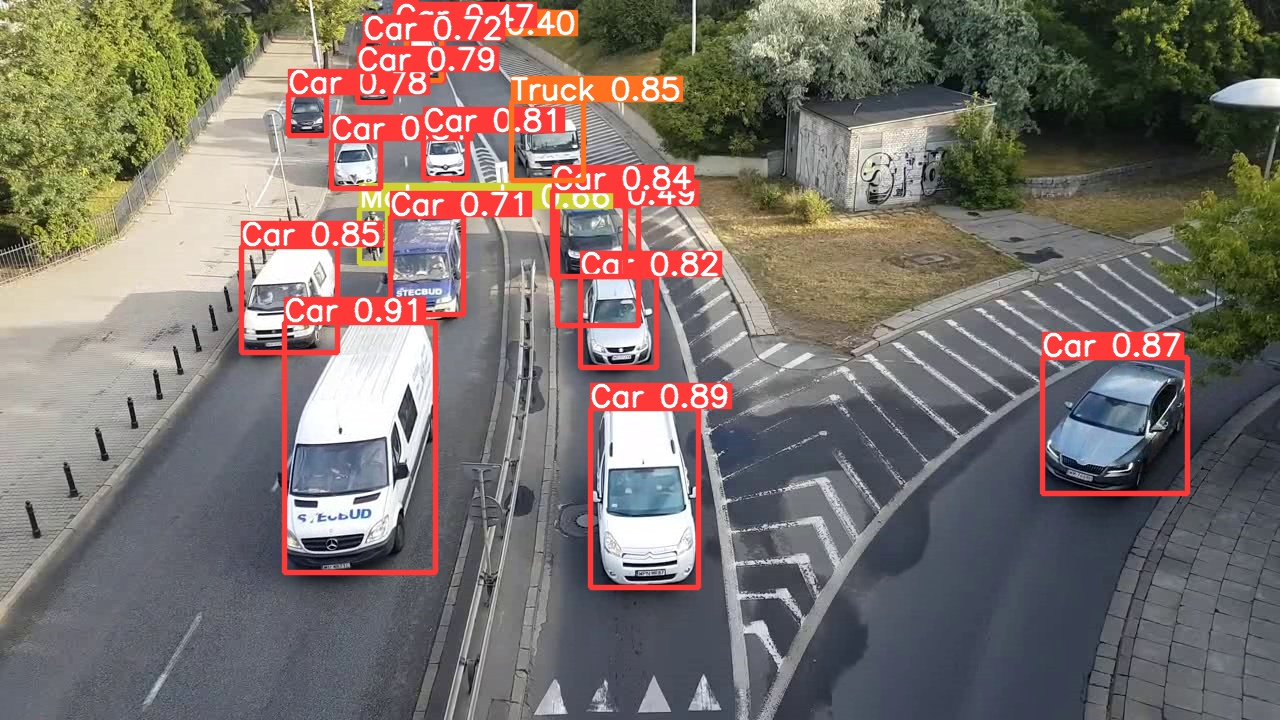

In [22]:
Image(filename='../yolov5/runs/detect/exp0/exp/video2_frame_7.jpg', width=640)


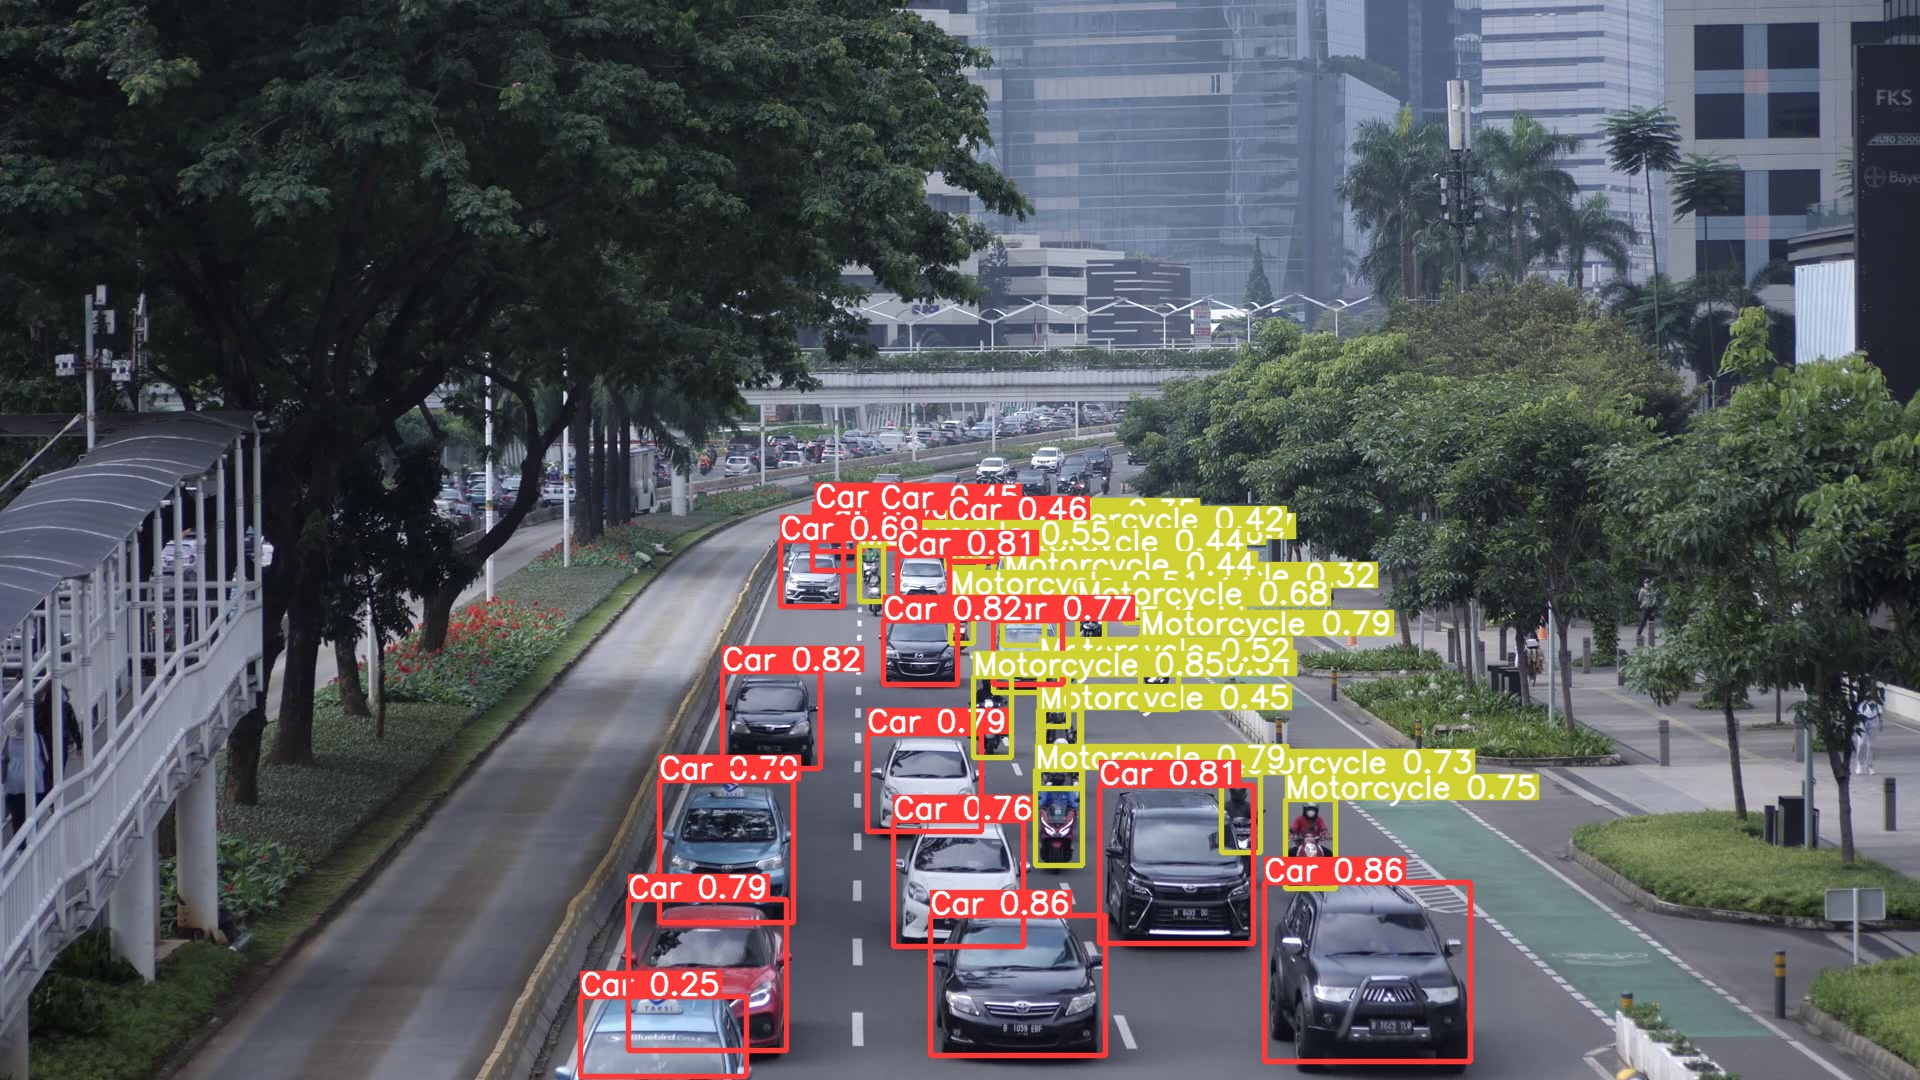

In [23]:
Image(filename='../yolov5/runs/detect/exp0/exp2/video4_frame_3.jpg', width=640)

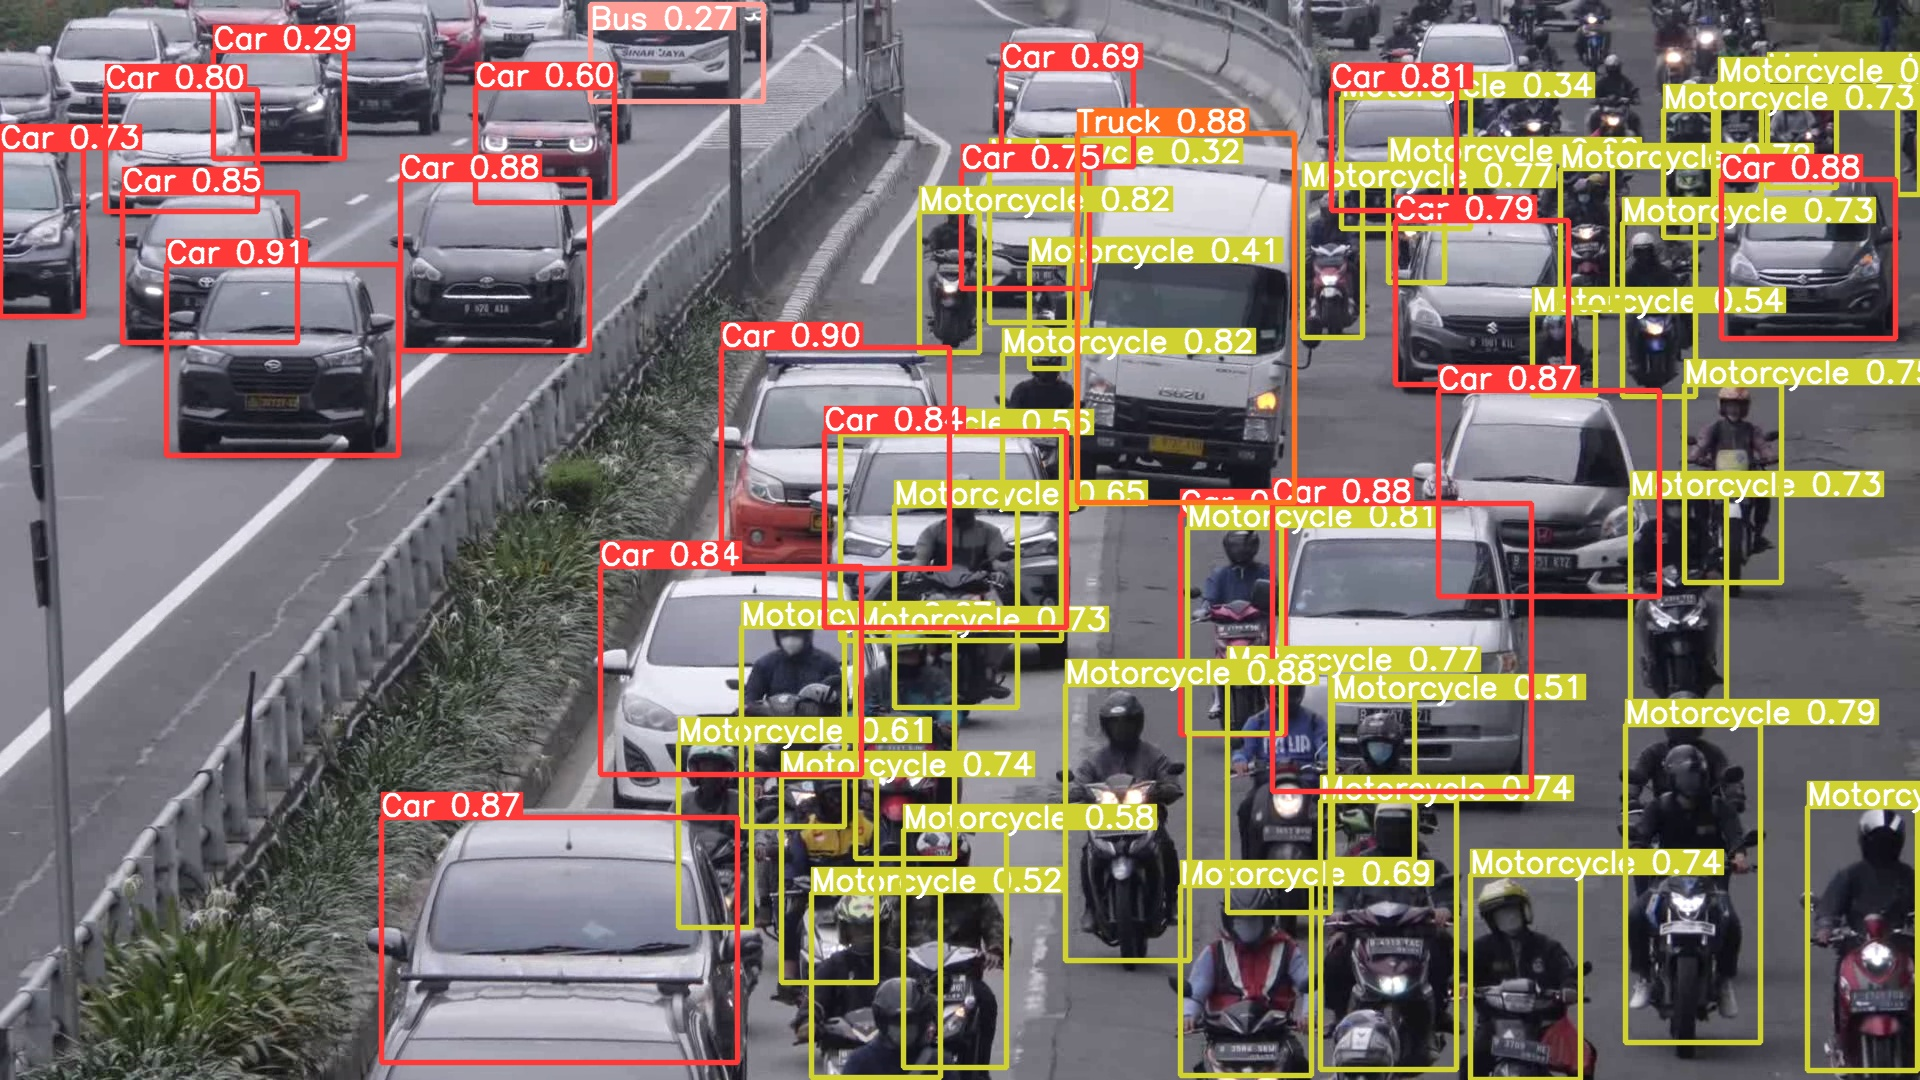

In [25]:
Image(filename='../yolov5/runs/detect/exp0/exp3/video6_frame_3.jpg', width=640)

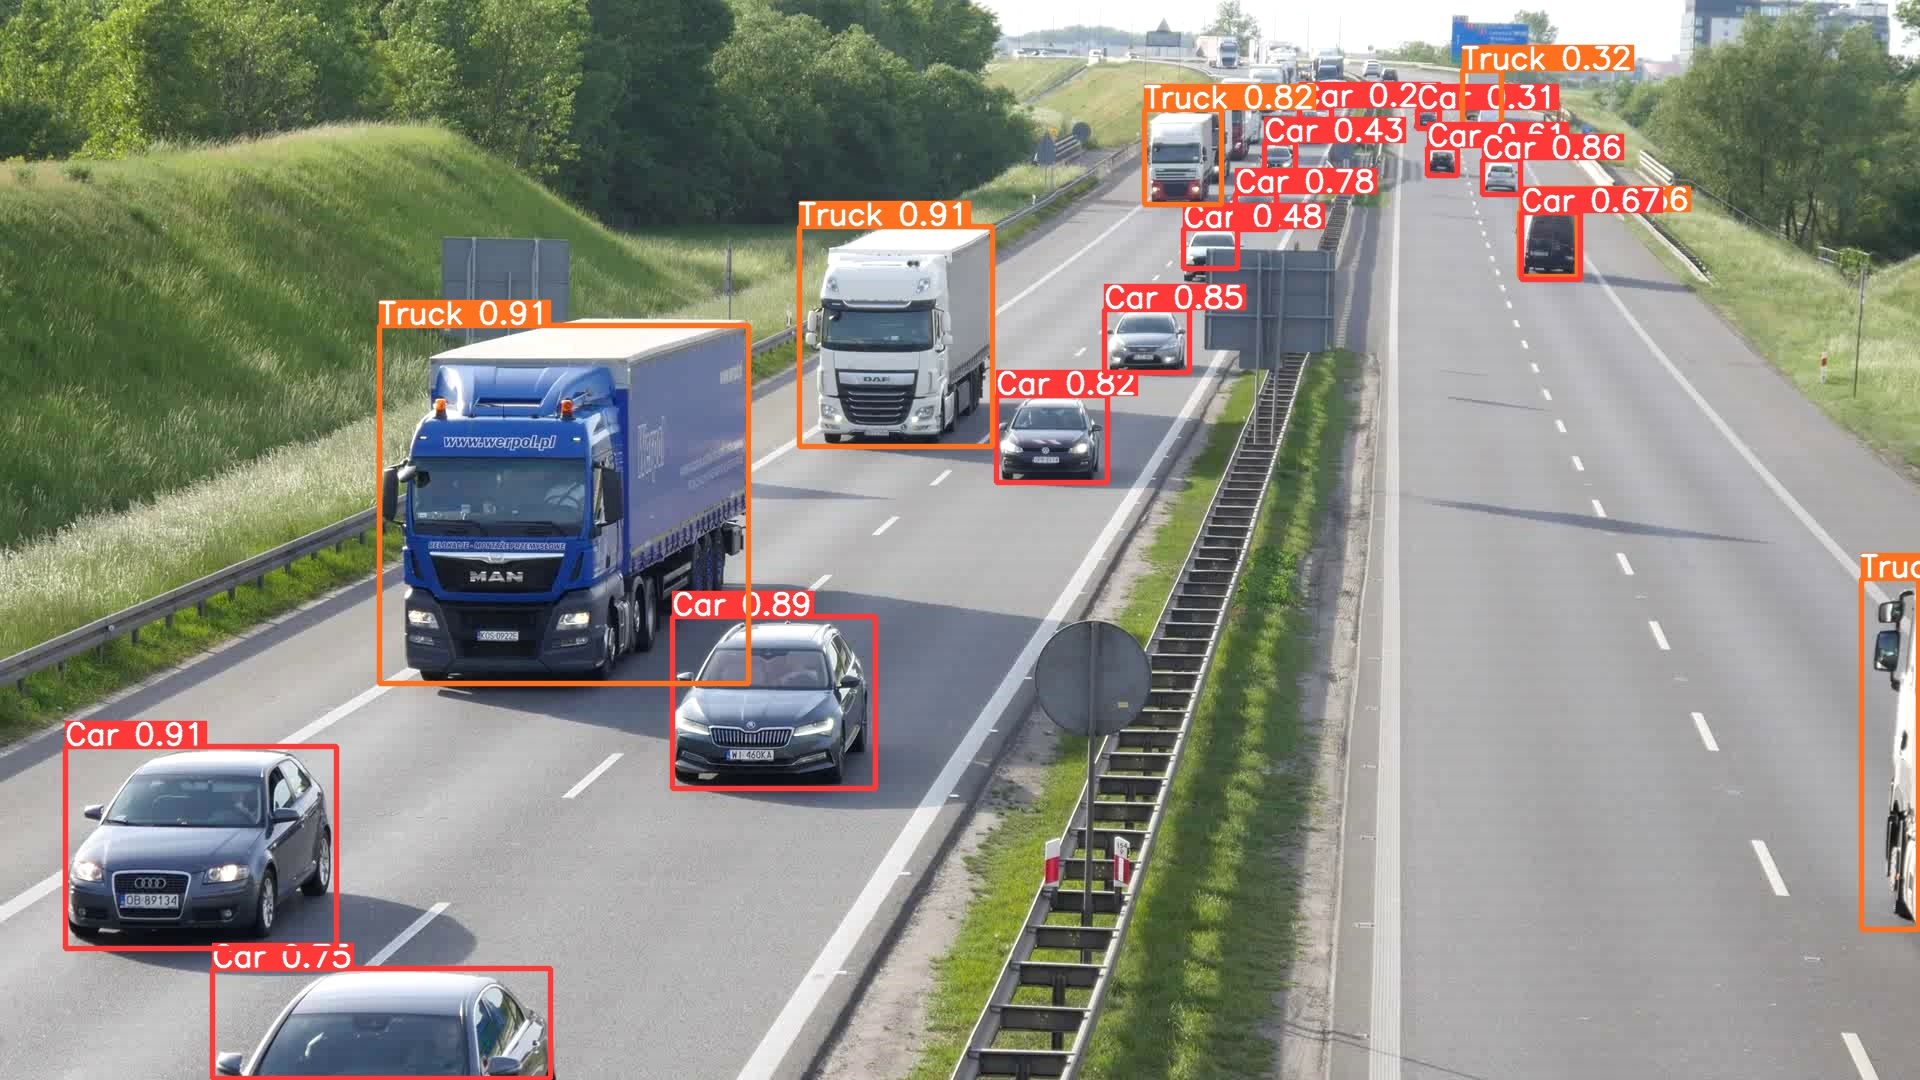

In [26]:
Image(filename='../yolov5/runs/detect/exp0/exp4/video5_frame_0.jpg', width=640)